In [203]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error , mean_absolute_error , classification_report
from sklearn.ensemble import RandomForestRegressor
import joblib

In [204]:
data = pd.read_csv("Concrete Compressive Strength.csv")
print(data.keys())
#print(np.shape(data))

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')


In [205]:
# regr = LinearRegression()
# X_train , X_test , Y_train , Y_test = train_test_split(data.iloc[:,0:8],data.iloc[:,8],test_size=0.3,shuffle=True,random_state=17)
# regr.fit(X_train,Y_train)
# regr.predict(X_test)
# print(mean_absolute_error(Y_test,regr.predict(X_test)))
# # RAW
# regr.coef_
# print(regr.score(data[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age (day)']],data['Concrete compressive strength '])
# )
# regr.predict([[200,30,0,200,9.14,1120,500,14]])
# print(mean_absolute_error())
# regr.intercept_
# plt.scatter(
#     data[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
#           'Coarse Aggregate', 'Fine Aggregate', 'Age (day)']].sum(axis=1),  
#     data['Concrete compressive strength ']
# )
# plt.ylabel('Concrete Compressive Strength')
# plt.xlabel('Collective features')
# joblib.dump(regr,"regression_model.pkl")


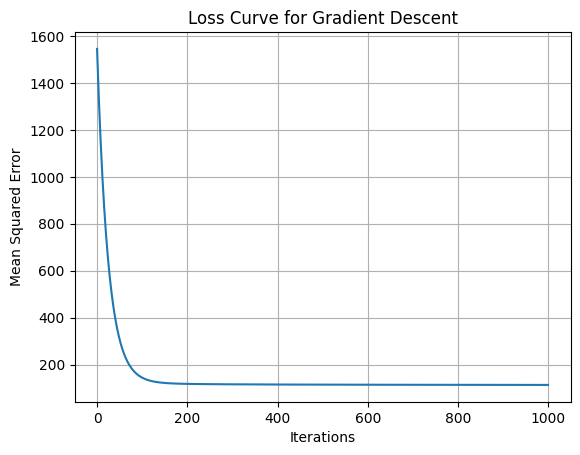

In [214]:
Y = data.iloc[:, 8].values
X = data.iloc[:, 0:8].values

X = (X - X.mean(axis=0)) / X.std(axis=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=17)

X_train = np.c_[np.ones(X_train.shape[0]), X_train] 
X_test = np.c_[np.ones(X_test.shape[0]), X_test]  

learning_rate = 0.01
iterations = 1000

theta = np.zeros(X_train.shape[1])

def gradient_descent(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    loss_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        
        error = predictions - Y
        
        gradient = (2/m) * X.T.dot(error)
        
        theta -= learning_rate * gradient
        
        mse = np.mean(error**2)
        loss_history.append(mse)
        
    return theta, loss_history

theta_optimal, loss_history = gradient_descent(X_train, Y_train, theta, learning_rate, iterations)

plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve for Gradient Descent")
plt.grid()
plt.show()

# print(f"Optimal parameters (slope and intercept): {theta_optimal}")
# predictions = X_test.dot(theta_optimal)
# mse_test = np.mean((predictions - Y_test) ** 2)
# print(f"Test MSE: {mse_test}")
# mae_test = np.mean(np.abs(predictions - Y_test))
# print(f"Test MAE: {mae_test}")

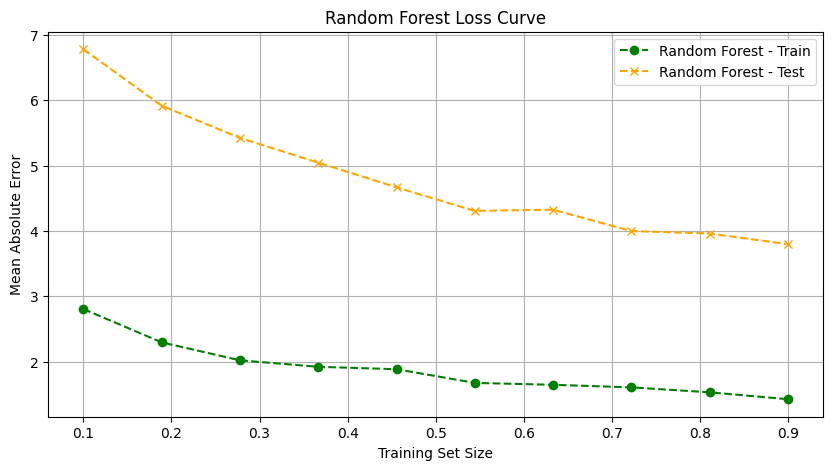

In [211]:
# # Random Forest 
# Y = data.iloc[:,8]
# x = data.iloc[:,0:8]
# # print(x)
# X_train , X_test , Y_train , Y_test = train_test_split(x,Y,test_size=0.3,shuffle=True,random_state=17)
# # print(X_train)
# rand_for = RandomForestRegressor()
# rand_for.fit(X_train,Y_train)
# # rand_for.predict(X_test)
# print(mean_absolute_error(Y_test,rand_for.predict(X_test)))


Y = data.iloc[:, 8]
X = data.iloc[:, 0:8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=17)

rand_for = RandomForestRegressor()

train_sizes = np.linspace(0.1, 0.9, 10)

rf_train_errors, rf_test_errors = [], []

for size in train_sizes:
    X_partial, _, Y_partial, _ = train_test_split(X_train, Y_train, train_size=size, random_state=17)

    rand_for.fit(X_partial, Y_partial)
    
    rf_train_errors.append(mean_absolute_error(Y_partial, rand_for.predict(X_partial)))
    rf_test_errors.append(mean_absolute_error(Y_test, rand_for.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, rf_train_errors, label="Random Forest - Train", linestyle="--", marker="o", color="green")
plt.plot(train_sizes, rf_test_errors, label="Random Forest - Test", linestyle="--", marker="x", color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Random Forest Loss Curve")
plt.legend()
plt.grid()
plt.show()

# print("Final Random Forest MAE on Test Set:", mean_absolute_error(Y_test, rand_for.predict(X_test)))



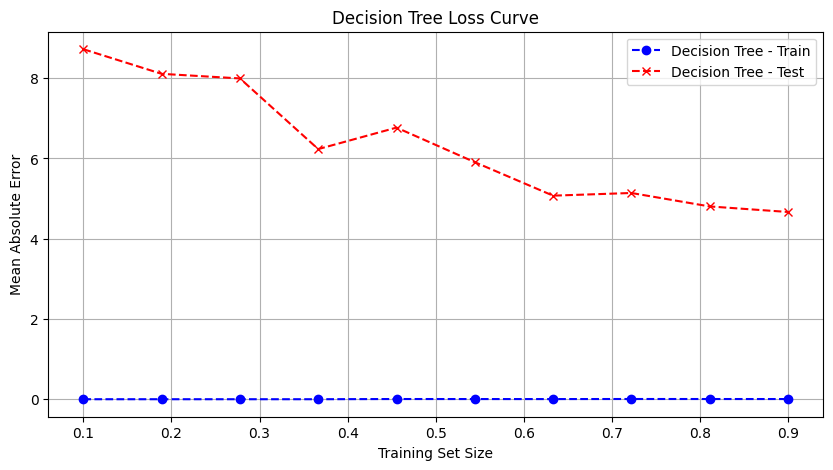

In [210]:


Y = data.iloc[:, 8]
X = data.iloc[:, 0:8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=17)

dec_tree = DecisionTreeRegressor()

train_sizes = np.linspace(0.1, 0.9, 10)  # Ensure train_size is between (0, 1)

dt_train_errors = []
dt_test_errors = []

for size in train_sizes:
    X_partial, _, Y_partial, _ = train_test_split(X_train, Y_train, train_size=size, random_state=17)
    
    dec_tree.fit(X_partial, Y_partial)
    
    train_mae = mean_absolute_error(Y_partial, dec_tree.predict(X_partial))
    test_mae = mean_absolute_error(Y_test, dec_tree.predict(X_test))
    
    dt_train_errors.append(train_mae)
    dt_test_errors.append(test_mae)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, dt_train_errors, label="Decision Tree - Train", linestyle="--", marker="o", color="blue")
plt.plot(train_sizes, dt_test_errors, label="Decision Tree - Test", linestyle="--", marker="x", color="red")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Decision Tree Loss Curve")
plt.legend()
plt.grid()
plt.show()

final_mae = mean_absolute_error(Y_test, dec_tree.predict(X_test))
# print("Final Decision Tree MAE on Test Set:", final_mae)
